In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('DATA/fake_reg.csv')

In [3]:
df.head()


,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


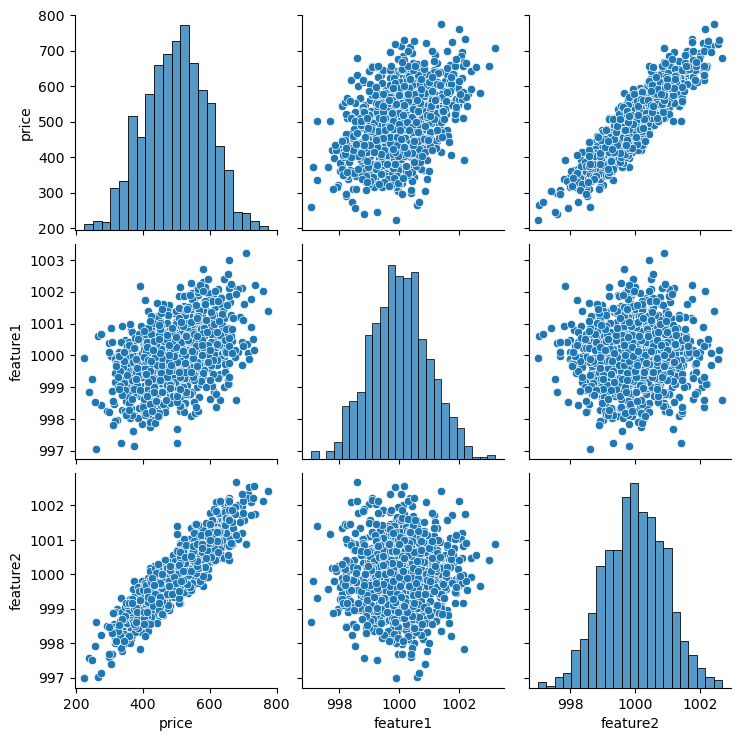

In [4]:
sns.pairplot(df)

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X = df[['feature1','feature2']].values #have to pass in numpy arrays to tf

In [7]:
y = df['price'].values

In [8]:
X

array([[ 999.78755752,  999.7660962 ],
       [ 998.86161491, 1001.04240315],
       [1000.07026691,  998.84401463],
       ...,
       [1001.45164617,  998.84760554],
       [1000.77102275,  998.56285086],
       [ 999.2322436 , 1001.45140713]])

In [9]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [10]:
X_train.shape

(700, 2)

In [11]:
X_test.shape

(300, 2)

In [12]:
from sklearn.preprocessing import  MinMaxScaler

In [13]:
help(MinMaxScaler)

Help on class MinMaxScaler in module sklearn.preprocessing._data:

class MinMaxScaler(sklearn.base.OneToOneFeatureMixin, sklearn.base.TransformerMixin, sklearn.base.BaseEstimator)
 |  MinMaxScaler(feature_range=(0, 1), *, copy=True, clip=False)
 |  
 |  Transform features by scaling each feature to a given range.
 |  
 |  This estimator scales and translates each feature individually such
 |  that it is in the given range on the training set, e.g. between
 |  zero and one.
 |  
 |  The transformation is given by::
 |  
 |      X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
 |      X_scaled = X_std * (max - min) + min
 |  
 |  where min, max = feature_range.
 |  
 |  This transformation is often used as an alternative to zero mean,
 |  unit variance scaling.
 |  
 |  Read more in the :ref:`User Guide <preprocessing_scaler>`.
 |  
 |  Parameters
 |  ----------
 |  feature_range : tuple (min, max), default=(0, 1)
 |      Desired range of transformed data.
 |  
 |  copy : bo

In [14]:
scaler = MinMaxScaler()

In [15]:
scaler.fit(X_train)

MinMaxScaler()

In [16]:
X_train = scaler.transform(X_train)

In [17]:
X_test = scaler.transform(X_test)

In [18]:
X_train

array([[0.74046017, 0.32583248],
       [0.43166001, 0.2555088 ],
       [0.18468554, 0.70500664],
       ...,
       [0.54913363, 0.79933822],
       [0.2834197 , 0.38818708],
       [0.56282703, 0.42371827]])

In [19]:
X_train.min()

0.0

In [20]:
X_train.max()

1.0

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

2024-02-21 18:22:16.993461: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [22]:
help(Sequential)

Help on class Sequential in module keras.src.engine.sequential:

class Sequential(keras.src.engine.functional.Functional)
 |  Sequential(layers=None, name=None)
 |  
 |  `Sequential` groups a linear stack of layers into a `tf.keras.Model`.
 |  
 |  `Sequential` provides training and inference features on this model.
 |  
 |  Examples:
 |  
 |  ```python
 |  model = tf.keras.Sequential()
 |  model.add(tf.keras.Input(shape=(16,)))
 |  model.add(tf.keras.layers.Dense(8))
 |  
 |  # Note that you can also omit the initial `Input`.
 |  # In that case the model doesn't have any weights until the first call
 |  # to a training/evaluation method (since it isn't yet built):
 |  model = tf.keras.Sequential()
 |  model.add(tf.keras.layers.Dense(8))
 |  model.add(tf.keras.layers.Dense(4))
 |  # model.weights not created yet
 |  
 |  # Whereas if you specify an `Input`, the model gets built
 |  # continuously as you are adding layers:
 |  model = tf.keras.Sequential()
 |  model.add(tf.keras.Input(s

In [23]:
model = Sequential([Dense(4,activation="relu"),
                   Dense(2,activation="relu"),
                   Dense(1)])

In [24]:
model = Sequential()

In [25]:
# preferred method
model = Sequential()

model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='rmsprop',loss='mse')

In [26]:
model.fit(x=X_train,y=y_train,epochs=250,verbose=1)

Epoch 1/250
22/22 [==============================] - 0s 823us/step - loss: 256766.8750
Epoch 2/250
22/22 [==============================] - 0s 667us/step - loss: 256698.1094
Epoch 3/250
22/22 [==============================] - 0s 672us/step - loss: 256662.0781
Epoch 4/250
22/22 [==============================] - 0s 683us/step - loss: 256632.9844
Epoch 5/250
22/22 [==============================] - 0s 662us/step - loss: 256602.2344
Epoch 6/250
22/22 [==============================] - 0s 661us/step - loss: 256568.2969
Epoch 7/250
22/22 [==============================] - 0s 648us/step - loss: 256530.9062
Epoch 8/250
22/22 [==============================] - 0s 653us/step - loss: 256489.7656
Epoch 9/250
22/22 [==============================] - 0s 667us/step - loss: 256444.4375
Epoch 10/250
22/22 [==============================] - 0s 661us/step - loss: 256394.1875
Epoch 11/250
22/22 [==============================] - 0s 654us/step - loss: 256338.4688
Epoch 12/250
22/22 [=====================

22/22 [==============================] - 0s 648us/step - loss: 72094.0234
Epoch 95/250
22/22 [==============================] - 0s 638us/step - loss: 66925.4141
Epoch 96/250
22/22 [==============================] - 0s 649us/step - loss: 61800.2070
Epoch 97/250
22/22 [==============================] - 0s 644us/step - loss: 56726.5898
Epoch 98/250
22/22 [==============================] - 0s 649us/step - loss: 51760.4297
Epoch 99/250
22/22 [==============================] - 0s 648us/step - loss: 46924.5273
Epoch 100/250
22/22 [==============================] - 0s 647us/step - loss: 42180.6875
Epoch 101/250
22/22 [==============================] - 0s 642us/step - loss: 37625.2383
Epoch 102/250
22/22 [==============================] - 0s 658us/step - loss: 33176.4453
Epoch 103/250
22/22 [==============================] - 0s 642us/step - loss: 28974.0918
Epoch 104/250
22/22 [==============================] - 0s 641us/step - loss: 24989.7109
Epoch 105/250
22/22 [==============================

22/22 [==============================] - 0s 639us/step - loss: 554.1109
Epoch 189/250
22/22 [==============================] - 0s 650us/step - loss: 536.8050
Epoch 190/250
22/22 [==============================] - 0s 654us/step - loss: 518.0427
Epoch 191/250
22/22 [==============================] - 0s 658us/step - loss: 500.1049
Epoch 192/250
22/22 [==============================] - 0s 652us/step - loss: 483.0408
Epoch 193/250
22/22 [==============================] - 0s 655us/step - loss: 462.8267
Epoch 194/250
22/22 [==============================] - 0s 668us/step - loss: 450.5143
Epoch 195/250
22/22 [==============================] - 0s 640us/step - loss: 434.5687
Epoch 196/250
22/22 [==============================] - 0s 641us/step - loss: 418.0313
Epoch 197/250
22/22 [==============================] - 0s 676us/step - loss: 401.9263
Epoch 198/250
22/22 [==============================] - 0s 693us/step - loss: 387.6870
Epoch 199/250
22/22 [==============================] - 0s 781us/step

In [27]:
loss_df = pd.DataFrame(model.history.history)

<Axes: >

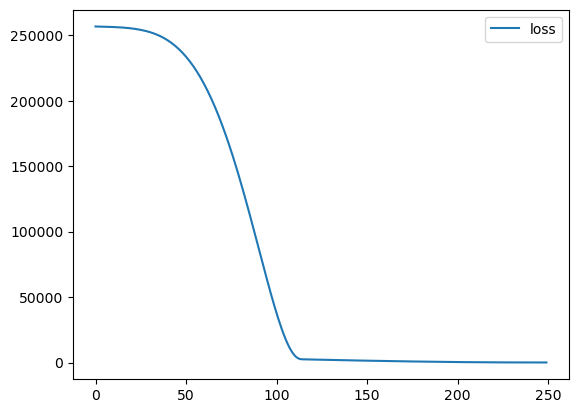

In [28]:
loss_df.plot()

In [29]:
model.evaluate(X_test,y_test,verbose=0)

26.89801025390625

In [30]:
model.evaluate(X_train,y_train,verbose=0)

25.984325408935547

In [31]:
test_predictions = model.predict(X_test)

10/10 [==============================] - 0s 686us/step


In [33]:
test_predictions

array([[406.6517 ],
       [621.87396],
       [590.64685],
       [571.85455],
       [369.62872],
       [578.2952 ],
       [515.97473],
       [459.28607],
       [549.17236],
       [447.77075],
       [610.2559 ],
       [547.2117 ],
       [420.35486],
       [410.44232],
       [648.0318 ],
       [437.90396],
       [507.46204],
       [658.7132 ],
       [660.7849 ],
       [564.2334 ],
       [337.1476 ],
       [445.71634],
       [384.62616],
       [380.43552],
       [565.798  ],
       [609.6898 ],
       [532.1552 ],
       [428.80453],
       [653.99554],
       [414.88556],
       [443.05154],
       [485.37854],
       [439.23386],
       [679.87964],
       [425.12332],
       [419.34735],
       [500.75955],
       [549.73206],
       [510.5052 ],
       [397.91498],
       [616.7499 ],
       [417.5085 ],
       [602.8454 ],
       [445.96973],
       [502.03104],
       [579.41925],
       [665.8108 ],
       [490.15097],
       [320.6392 ],
       [485.7843 ],


In [34]:
test_predictions = pd.Series(test_predictions.reshape(300,))


In [35]:
test_predictions

0      406.651703
1      621.873962
2      590.646851
3      571.854553
4      369.628723
          ...    
295    529.187195
296    516.985107
297    608.052429
298    417.631714
299    412.586792
Length: 300, dtype: float32

In [36]:
pred_df = pd.DataFrame(y_test,columns=['Test True Y'])

In [37]:
pred_df = pd.concat([pred_df,test_predictions],axis=1)

In [39]:
pred_df.columns = ['Test True Y','Model Predictions']

In [40]:
pred_df

,Test True Y,Model Predictions
0,402.296319,406.651703
1,624.156198,621.873962
2,582.455066,590.646851
3,578.588606,571.854553
4,371.224104,369.628723
...,...,...
295,525.704657,529.187195
296,502.909473,516.985107
297,612.727910,608.052429
298,417.569725,417.631714


<Axes: xlabel='Test True Y', ylabel='Model Predictions'>

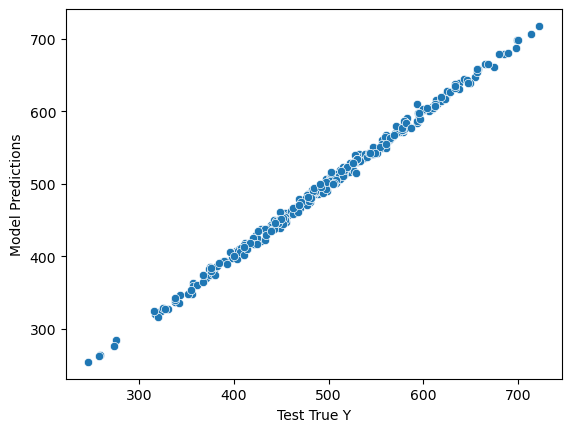

In [41]:
sns.scatterplot(x='Test True Y',y='Model Predictions',data=pred_df,)

In [42]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [43]:
mean_absolute_error(pred_df['Test True Y'],pred_df['Model Predictions'])

4.219815169726032

In [44]:
df.describe()

,price,feature1,feature2
count,1000.000000,1000.000000,1000.000000
mean,498.673029,1000.014171,999.979847
std,93.785431,0.974018,0.948330
min,223.346793,997.058347,996.995651
25%,433.025732,999.332068,999.316106
50%,502.382117,1000.009915,1000.002243
75%,564.921588,1000.637580,1000.645380
max,774.407854,1003.207934,1002.666308


In [45]:
# only off $4.21 on our prediction which is less than 1%

In [46]:
mean_squared_error(pred_df['Test True Y'],pred_df['Model Predictions'])

26.898014989834653

In [48]:
#root mean squared error
mean_squared_error(pred_df['Test True Y'],pred_df['Model Predictions'])**0.5

5.186329626029824

In [49]:
new_gem = [[998,1000]]

In [51]:
new_gem = scaler.transform(new_gem) #scale it first

In [52]:
model.predict(new_gem)

1/1 [==============================] - 0s 13ms/step


array([[421.88397]], dtype=float32)

In [53]:
from tensorflow.keras.models import load_model

In [54]:
model.save('my_gem_model.h5')

/Users/tylercoen/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [55]:
later_model = load_model('my_gem_model.h5')

In [56]:
later_model.predict(new_gem)

1/1 [==============================] - 0s 35ms/step


array([[421.88397]], dtype=float32)